# Analysing human motion with the mpu6050 sensor to specify walk, stair-walking, squats and the stand-lie down datasets.
Date: 02-01-2024, Author: Linda Hoogerwerf  
On behalf of the Research Centre Innovations in Care at the Rotterdam university of applied sciences, project Motion Sensors.

## 1. Abstract

## 2. Introduction

## 3. Methodology

## 4. Analysis

### 4.1 Import libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq

### 4.2 Data cleaning & importing datasets in Jupyter Notebook

Focus on a couple cleaning points:
1) Adding columns
2) Remove all rows with no input
3) Reset the index
4) Add the time reference of the samples
5) Show cleaned dataset

First of all, there are a couple cleaning steps in excel before importing the datasets in Jupiter Notebook. 
1) Delete column 1 and 2
2) Delete rows till 00:00:03
3) Replace 'Roll: ' with '', to isolate the data from the text.

After these staps, importing can proceed. Make sure to place the dataset files in the same folder as the Jupiter Notebook file. 

In [51]:
input_frequency = 36

def clean_data(dataset):
    colnames=['Time', 'Yaw', 'Pitch', 'Roll']
    df = pd.read_csv(dataset, usecols=[1, 2, 3, 4], names=colnames, header=None)
    df = df[df['Yaw'].notna()]
    df.reset_index(drop=True, inplace=True)
    df = df.iloc[72:]
    df.reset_index(drop=True, inplace=True)
    data = 1/input_frequency + 1/input_frequency*np.arange(0,len(df))
    df['Time']= data
    return df

walk_data_1 = clean_data("lopen_test1.csv")
walk_data_2 = clean_data("lopen_test2.csv")
walk_data_3 = clean_data("lopen_test3.csv")

stand_liedown_data_1 = clean_data("liggen_test1.csv")
stand_liedown_data_2 = clean_data("liggen_test2.csv")
stand_liedown_data_3 = clean_data("liggen_test3.csv")

stair_up_down_data_1 = clean_data("trapA_test1.csv")
stair_up_down_data_2 = clean_data("trapA_test2.csv")
stair_up_down_data_3 = clean_data("trapA_test3.csv")

stair_up_data_1 = clean_data("trapB_test1.csv")
stair_up_data_2 = clean_data("trapB_test2.csv")
stair_up_data_3 = clean_data("trapB_test3.csv")

stair_down_data_1 = clean_data("trapC_test1.csv")
stair_down_data_1 = clean_data("trapC_test1.csv")
stair_down_data_1 = clean_data("trapC_test1.csv")

squat_data_1 = clean_data("hurk_test1.csv")
squat_data_2 = clean_data("hurk_test2.csv")
squat_data_3 = clean_data("hurk_test3.csv")

squat_data_3

,Time,Yaw,Pitch,Roll
0,0.027778,25.93,-25.52,-79.45
1,0.055556,25.61,-26.89,-78.04
2,0.083333,25.33,-28.56,-76.91
3,0.111111,25.38,-29.83,-76.21
4,0.138889,26.03,-30.30,-76.92
...,...,...,...,...
2934,81.527778,41.94,35.38,-75.28
2935,81.555556,41.32,35.65,-76.03
2936,81.583333,40.62,35.00,-76.89
2937,81.611111,39.83,33.76,-77.90


### 4.3 Initial graph of the dataset

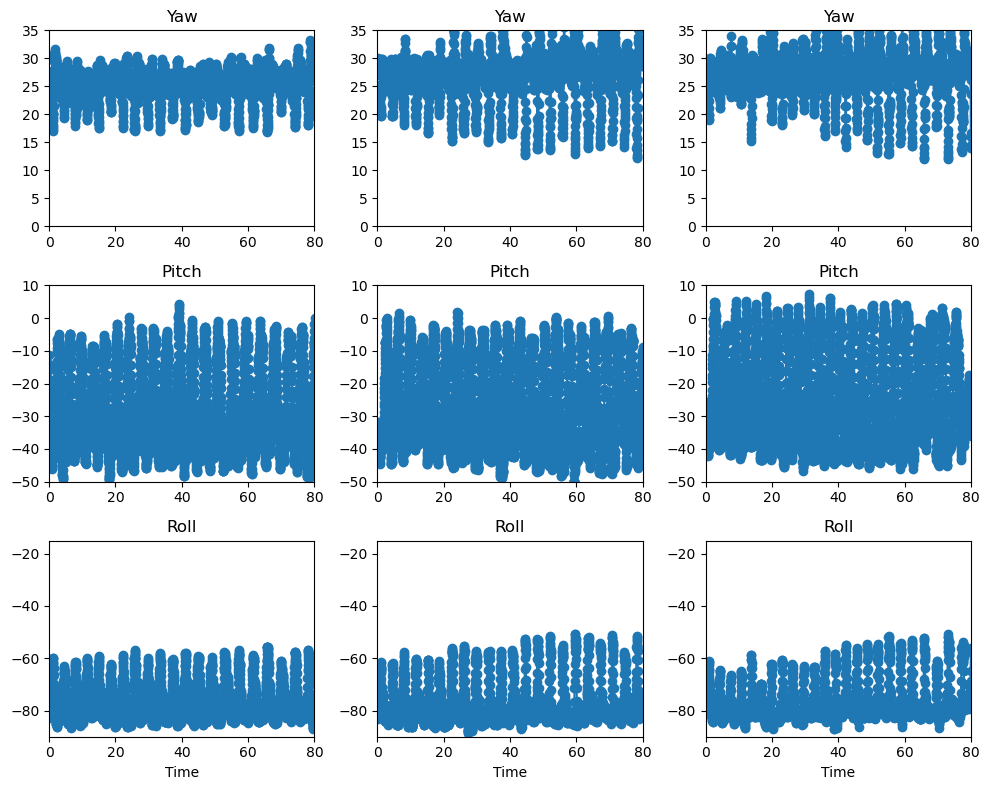

In [52]:
def initial_graph(df_1, df_2, df_3):
    list_of_datasets = [df_1, df_2, df_3]
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize= (10, 8))
    col = 0
    for df in list_of_datasets:

        ax[0, col].plot(df["Time"], df["Yaw"], marker='o')
        ax[0, col].set_title('Yaw')
        ax[0, col].set_xlim(0,80)
        ax[0, col].set_ylim(0,35)

        ax[1, col].plot(df["Time"], df["Pitch"], marker='o')
        ax[1, col].set_title('Pitch')
        ax[1, col].set_xlim(0,80)
        ax[1, col].set_ylim(-50,10)

        ax[2, col].plot(df["Time"], df["Roll"], marker='o')
        ax[2, col].set_title('Roll')
        ax[2, col].set_xlabel('Time')
        ax[2, col].set_xlim(0,80)
        ax[2, col].set_ylim(-90,-15)
        col += 1
    
    plt.tight_layout()
    plt.show() 

initial_graph(squat_data_1, squat_data_2,  squat_data_3)


In [ ]:
# from IPython.core.debugger import Pdb; Pdb().set_trace()
def graph_fourier(list_of_frequencies, list_of_fft_psd): 
    fig, ax = plt.subplots(3, 3, figsize=(10, 10))
    col = 0
    for count in list_of_frequnecies
    
    
        i = df[3] > 0   #df[3] = fftfreq0 -> boolean

#         ax[0, col].plot(list_of_frequencies[count][0], np.dot((df[3])**-2, df[0])) #df[3] = fftfreq0, df[0] = df_yaw_psd
# #                         Check om multiply of divide

#         ax[0, col].set_xlim(0, 20)
#         ax[0, col].set_title('Yaw')    
#         ax[0, col].set_xlabel('Frequency (36Hz)')
#         ax[0, col].set_ylabel('PSD, magnitude (dB)')

#         ax[1, col].plot(df[4], 10 * np.log10(df[1])) #df[4] = fftfreq1, df[1] = df_pitch_psd
#         ax[1, col].set_xlim(0, 20)
#         ax[1, col].set_title('Pitch')                      
#         ax[1, col].set_xlabel('Frequency (36Hz)')
#         ax[1, col].set_ylabel('PSD, magnitude (dB)')

#         ax[2, col].plot(df[5], 10 * np.log10(df[2])) #df[5] = fftfreq2, df[2] = df_roll_psd
#         ax[2, col].set_xlim(0, 20)
#         ax[2, col].set_title('Roll')    
#         ax[2, col].set_xlabel('Frequency (36Hz)')
#         ax[2, col].set_ylabel('PSD, magnitude (dB)')
#         col += 1
#     plt.tight_layout()
#     plt.show() 

### 4.4 Fourier transform on sensor data with graph

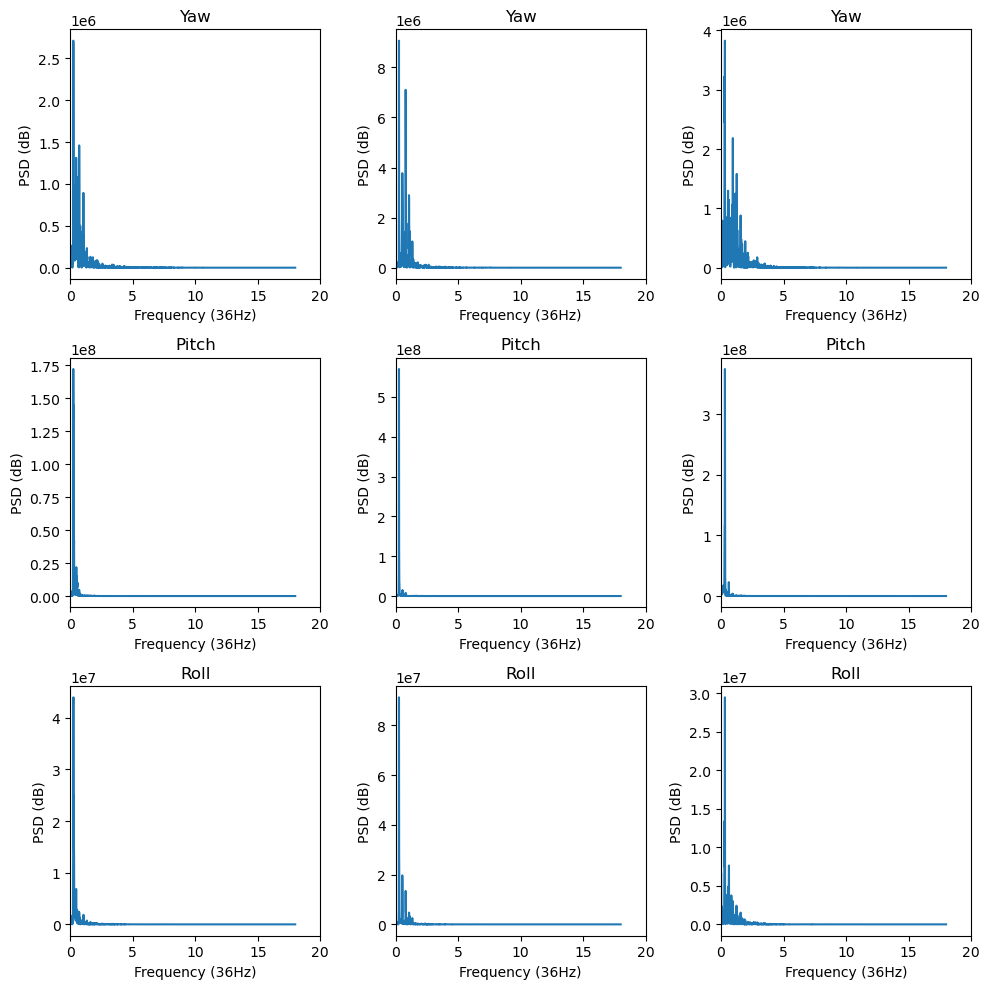

In [55]:
def graph_fourier(list_of_frequencies, list_of_fft_psd): 
    fig, ax = plt.subplots(3, 3, figsize=(10, 10))
    count = 0

    while count < len(list_of_frequencies):
        i = list_of_frequencies[count][0] > 0   #-> boolean

        ax[0, count].plot(list_of_frequencies[count][0][i], list_of_fft_psd[count][0][i] ) 
        ax[0, count].set_xlim(0, 20)
        ax[0, count].set_title('Yaw')    
        ax[0, count].set_xlabel('Frequency (36Hz)')
        ax[0, count].set_ylabel('PSD (dB)')

        ax[1, count].plot(list_of_frequencies[count][1][i], list_of_fft_psd[count][1][i]) 
        ax[1, count].set_xlim(0, 20)
        ax[1, count].set_title('Pitch')                      
        ax[1, count].set_xlabel('Frequency (36Hz)')
        ax[1, count].set_ylabel('PSD (dB)')

        ax[2, count].plot(list_of_frequencies[count][2][i], list_of_fft_psd[count][2][i])
        ax[2, count].set_xlim(0, 20)
        ax[2, count].set_title('Roll')    
        ax[2, count].set_xlabel('Frequency (36Hz)')
        ax[2, count].set_ylabel('PSD (dB)')
        count += 1
    plt.savefig('fourier.pdf')
    plt.tight_layout()
    plt.show() 
    
def fourier_data(df_1, df_2, df_3):
    list_of_datasets = [df_1, df_2, df_3]
    w, h = 3, 3
    list_of_frequencies = [[0 for x in range(w)] for y in range(h)]
    list_of_fft_psd = [[0 for x in range(w)] for y in range(h)]
    sampling_rate = 36
    x = 0
    for df in list_of_datasets:       
        data_yaw = np.array(df['Yaw'])
        df_yaw_fft = fft(data_yaw)                              #fft_values = np.fft.fft(data)
        df_yaw_psd = np.abs(df_yaw_fft) ** 2                    #fft_magnitude = np.abs(fft_values)
        fftfreq0 = fftfreq(len(data_yaw), (1/sampling_rate))    #frequency = fftfreq(n, d = 1/sampling_rate), n=len(data)

        data_pitch = np.array(df['Pitch'])
        df_pitch_fft = fft(data_pitch)
        df_pitch_psd = np.abs(df_pitch_fft) ** 2
        fftfreq1 = fftfreq(len(data_pitch), (1/sampling_rate))

        data_roll = np.array(df['Roll'])
        df_roll_fft = fft(data_roll)
        df_roll_psd = np.abs(df_roll_fft) ** 2
        fftfreq2 = fftfreq(len(data_roll), (1/sampling_rate))
        
        list_of_frequencies[x]=[fftfreq0, fftfreq1, fftfreq2]
        list_of_fft_psd[x] = [df_yaw_psd, df_pitch_psd, df_roll_psd]
        x +=1
    return list_of_frequencies, list_of_fft_psd
   
list_of_frequencies1, list_of_fft_psd1 = fourier_data(squat_data_1, squat_data_2,  squat_data_3)
graph_fourier(list_of_frequencies, list_of_fft_psd)


### 4.5 Smooth out signal 

In [56]:
# Not yet adjusted to multiple datasets. Code not functional now.
df_yaw_fft_bis = df_yaw_fft.copy()
df_yaw_fft_bis[np.abs(fftfreq0) > 1.1] = 0
df_yaw_slow = np.real(ifft(df_yaw_fft_bis))

df_pitch_fft_bis = df_pitch_fft.copy()
df_pitch_fft_bis[np.abs(fftfreq1) > 1.1] = 0
df_pitch_slow = np.real(ifft(df_pitch_fft_bis))

df_roll_fft_bis = df_roll_fft.copy()
df_roll_fft_bis[np.abs(fftfreq2) > 1.1] = 0
df_roll_slow = np.real(ifft(df_roll_fft_bis))

fig, ax = plt.subplots(3, 1, figsize=(10, 8))

ax[0].plot(df["Time"], df_yaw_slow, color='blue', label='Smooth signal')
ax[0].plot(df["Time"], df["Yaw"], color='red', label='Original signal')
ax[0].legend()
ax[0].set_title('Yaw')
ax[0].set_xlim(0,30)
ax[0].set_ylim(-10, 40)
ax[0].set_xlabel('Time')

ax[1].plot(df["Time"], df_pitch_slow, color='blue', label='Smooth signal')
ax[1].plot(df["Time"], df["Pitch"], color='red', label='Original signal')
ax[1].legend()
ax[1].set_xlim(0,30)
ax[1].set_title('Pitch')
ax[1].set_xlabel('Time')

ax[2].plot(df["Time"], df_roll_slow, color='blue', label='Smooth signal')
ax[2].plot(df["Time"], df["Roll"], color='red', label='Original signal')
ax[2].legend()
ax[2].set_xlim(0,30)
ax[2].set_title('Roll')
ax[2].set_xlabel('Time')

plt.tight_layout()
plt.show() 

NameError: name 'df_yaw_fft' is not defined

## Results

## Discussion